<a href="https://colab.research.google.com/github/ashwinperti/LSTM_phd/blob/main/LSTM_TimeSeries_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os

In [3]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13582336/13568290 [==============================] - 1s 0us/step


In [4]:
df = pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [5]:
# Slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [6]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


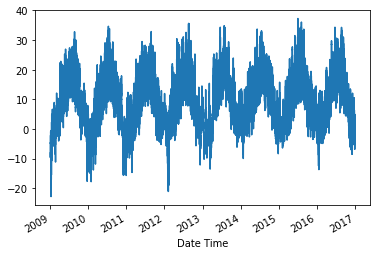

In [7]:
import matplotlib
temp = df['T (degC)']
temp.plot()

ValueError: ignored

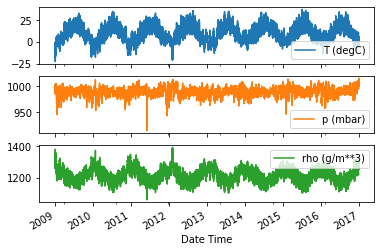

In [8]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [ ]:
df.describe().transpose()

In [9]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

# The above inplace edits are reflected in the DataFrame.
df['wv (m/s)'].min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

0.0

In [10]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

Depending on the task and type of model you may want to generate a variety of data windows. Here are some examples:

For example, to make a single prediction 24 hours into the future, given 24 hours of history, you might define a window like this:

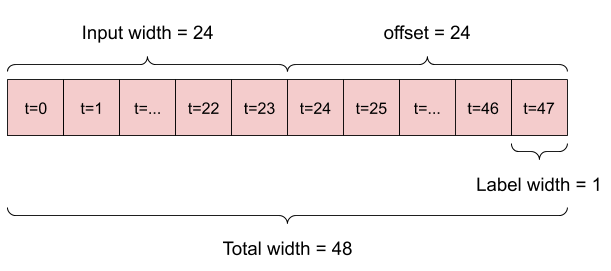

In [38]:
WINDOW_SIZE = 5
X,y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((70086, 5, 1), (70086,))

In [12]:
X[9000:95000]

array([[[-5.99],
        [-5.92],
        [-6.18],
        [-6.51],
        [-6.61]],

       [[-5.92],
        [-6.18],
        [-6.51],
        [-6.61],
        [-6.77]],

       [[-6.18],
        [-6.51],
        [-6.61],
        [-6.77],
        [-6.74]],

       ...,

       [[ 2.44],
        [ 1.29],
        [-0.42],
        [-0.98],
        [-1.4 ]],

       [[ 1.29],
        [-0.42],
        [-0.98],
        [-1.4 ],
        [-2.75]],

       [[-0.42],
        [-0.98],
        [-1.4 ],
        [-2.75],
        [-2.89]]])

In [39]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [40]:
print(X_val)

[[[ 6.07]
  [ 9.88]
  [13.53]
  [15.43]
  [15.54]]

 [[ 9.88]
  [13.53]
  [15.43]
  [15.54]
  [14.02]]

 [[13.53]
  [15.43]
  [15.54]
  [14.02]
  [13.67]]

 ...

 [[20.27]
  [21.29]
  [18.43]
  [18.27]
  [17.85]]

 [[21.29]
  [18.43]
  [18.27]
  [17.85]
  [16.65]]

 [[18.43]
  [18.27]
  [17.85]
  [16.65]
  [15.85]]]


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [42]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [43]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp1])

Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 42.3843 - root_mean_squared_error: 6.5103

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 15s 7ms/step - loss: 42.3639 - root_mean_squared_error: 6.5088 - val_loss: 1.6627 - val_root_mean_squared_error: 1.2895
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 3.3340 - root_mean_squared_error: 1.8259

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 3.3342 - root_mean_squared_error: 1.8260 - val_loss: 0.6609 - val_root_mean_squared_error: 0.8130
Epoch 3/10
1863/1875 [============================>.] - ETA: 0s - loss: 1.1537 - root_mean_squared_error: 1.0741

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 1.1544 - root_mean_squared_error: 1.0744 - val_loss: 0.5433 - val_root_mean_squared_error: 0.7371
Epoch 4/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.7899 - root_mean_squared_error: 0.8888

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.7903 - root_mean_squared_error: 0.8890 - val_loss: 0.5149 - val_root_mean_squared_error: 0.7176
Epoch 5/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.7004 - root_mean_squared_error: 0.8369

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 14s 7ms/step - loss: 0.7005 - root_mean_squared_error: 0.8370 - val_loss: 0.5131 - val_root_mean_squared_error: 0.7163
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6729 - root_mean_squared_error: 0.8203 - val_loss: 0.5137 - val_root_mean_squared_error: 0.7167
Epoch 7/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.6613 - root_mean_squared_error: 0.8132

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.6615 - root_mean_squared_error: 0.8133 - val_loss: 0.4954 - val_root_mean_squared_error: 0.7038
Epoch 8/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.6535 - root_mean_squared_error: 0.8084

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.6535 - root_mean_squared_error: 0.8084 - val_loss: 0.4884 - val_root_mean_squared_error: 0.6989
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6487 - root_mean_squared_error: 0.8054 - val_loss: 0.5184 - val_root_mean_squared_error: 0.7200
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6457 - root_mean_squared_error: 0.8035 - val_loss: 0.4895 - val_root_mean_squared_error: 0.6997


In [44]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [45]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

,Train Predictions,Actuals
0,-9.740754,-9.67
1,-9.482854,-9.17
2,-8.693797,-8.10
3,-7.271549,-7.66
4,-7.195401,-7.04
...,...,...
59995,6.101719,6.07
59996,7.335381,9.88
59997,12.197438,13.53
59998,15.781587,15.43


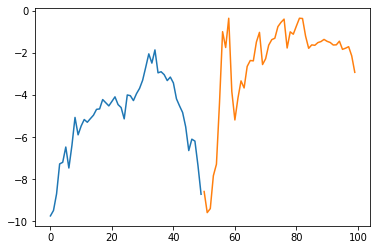

In [46]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:50])
plt.plot(train_results['Train Predictions'][50:100])

In [47]:
#val_predictions = model1.predict(X_val).flatten()
val_predictions = model1.predict(X_val).flatten()

val_results = pd.DataFrame(data={'Val Predictions':val_predictions,'Actuals':y_val})
val_results

,Val Predictions,Actuals
0,15.311560,14.02
1,13.086311,13.67
2,12.897973,12.27
3,11.408601,11.19
4,10.369412,10.85
...,...,...
4995,17.206732,18.27
4996,17.237719,17.85
4997,17.114771,16.65
4998,15.738007,15.85


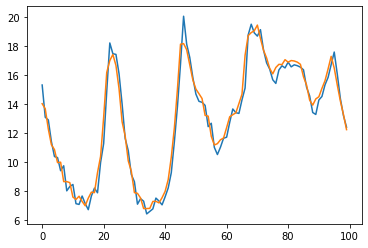

In [48]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [49]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions,'Actuals':y_test})
test_results

,Test Predictions,Actuals
0,14.239196,13.99
1,13.106074,13.46
2,12.741378,12.93
3,12.351409,12.43
4,11.923612,12.17
...,...,...
5081,-1.058125,-0.98
5082,-1.232357,-1.40
5083,-1.600347,-2.75
5084,-3.150644,-2.89


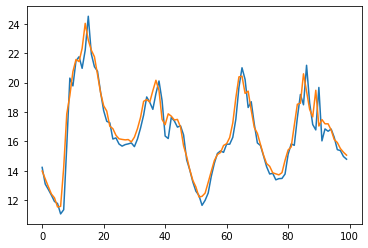

In [50]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [51]:
# Part 2
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(      Predictions  Actuals
 0       14.239196    13.99
 1       13.106074    13.46
 2       12.741378    12.93
 3       12.351409    12.43
 4       11.923612    12.17
 ...           ...      ...
 5081    -1.058125    -0.98
 5082    -1.232357    -1.40
 5083    -1.600347    -2.75
 5084    -3.150644    -2.89
 5085    -3.022844    -3.93
 
 [5086 rows x 2 columns], 0.6702114721996568)

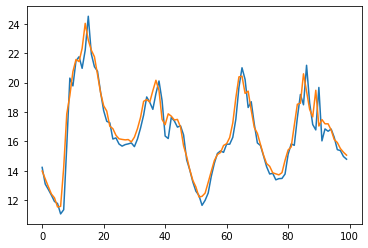

In [52]:
plot_predictions1(model1, X_test, y_test)

In [53]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 8)                 2056      
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [55]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp2])

Epoch 1/10
1865/1875 [============================>.] - ETA: 0s - loss: 5.8305 - root_mean_squared_error: 2.4146INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 13s 4ms/step - loss: 5.8058 - root_mean_squared_error: 2.4095 - val_loss: 0.8813 - val_root_mean_squared_error: 0.9388
Epoch 2/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.9423 - root_mean_squared_error: 0.9707INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 7s 3ms/step - loss: 0.9421 - root_mean_squared_error: 0.9706 - val_loss: 0.6071 - val_root_mean_squared_error: 0.7792
Epoch 3/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.7477 - root_mean_squared_error: 0.8647INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.7481 - root_mean_squared_error: 0.8649 - val_loss: 0.5298 - val_root_mean_squared_error: 0.7279
Epoch 4/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.7005 - root_mean_squared_error: 0.8370INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.7005 - root_mean_squared_error: 0.8370 - val_loss: 0.5190 - val_root_mean_squared_error: 0.7204
Epoch 5/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.6853 - root_mean_squared_error: 0.8279INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.6858 - root_mean_squared_error: 0.8281 - val_loss: 0.5049 - val_root_mean_squared_error: 0.7106
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6787 - root_mean_squared_error: 0.8239 - val_loss: 0.5374 - val_root_mean_squared_error: 0.7330
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6758 - root_mean_squared_error: 0.8220 - val_loss: 0.5072 - val_root_mean_squared_error: 0.7122
Epoch 8/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.6685 - root_mean_squared_error: 0.8176INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.6690 - root_mean_squared_error: 0.8179 - val_loss: 0.5037 - val_root_mean_squared_error: 0.7097
Epoch 9/10
1875/1875 [==============================] - ETA: 0s - loss: 0.6658 - root_mean_squared_error: 0.8160INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.6658 - root_mean_squared_error: 0.8160 - val_loss: 0.4920 - val_root_mean_squared_error: 0.7014
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6645 - root_mean_squared_error: 0.8152 - val_loss: 0.4940 - val_root_mean_squared_error: 0.7029


In [56]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [58]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp3])

Epoch 1/10
1866/1875 [============================>.] - ETA: 0s - loss: 33.1680 - root_mean_squared_error: 5.7592

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 14s 6ms/step - loss: 33.0369 - root_mean_squared_error: 5.7478 - val_loss: 1.3167 - val_root_mean_squared_error: 1.1475
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 2.8222 - root_mean_squared_error: 1.6800

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 12s 7ms/step - loss: 2.8213 - root_mean_squared_error: 1.6797 - val_loss: 0.6571 - val_root_mean_squared_error: 0.8106
Epoch 3/10
1865/1875 [============================>.] - ETA: 0s - loss: 1.0612 - root_mean_squared_error: 1.0301

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 1.0622 - root_mean_squared_error: 1.0306 - val_loss: 0.5468 - val_root_mean_squared_error: 0.7395
Epoch 4/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.7563 - root_mean_squared_error: 0.8696

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.7568 - root_mean_squared_error: 0.8699 - val_loss: 0.5054 - val_root_mean_squared_error: 0.7109
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6817 - root_mean_squared_error: 0.8257 - val_loss: 0.5066 - val_root_mean_squared_error: 0.7118
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6589 - root_mean_squared_error: 0.8117 - val_loss: 0.5066 - val_root_mean_squared_error: 0.7117
Epoch 7/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.6512 - root_mean_squared_error: 0.8070

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.6506 - root_mean_squared_error: 0.8066 - val_loss: 0.4970 - val_root_mean_squared_error: 0.7050
Epoch 8/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.6462 - root_mean_squared_error: 0.8039

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.6462 - root_mean_squared_error: 0.8039 - val_loss: 0.4889 - val_root_mean_squared_error: 0.6992
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6432 - root_mean_squared_error: 0.8020 - val_loss: 0.4973 - val_root_mean_squared_error: 0.7052
Epoch 10/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.6415 - root_mean_squared_error: 0.8009

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.6416 - root_mean_squared_error: 0.8010 - val_loss: 0.4867 - val_root_mean_squared_error: 0.6977


In [59]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [60]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917


In [61]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


In [62]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [63]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [64]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

In [65]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                17920     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [66]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1866/1875 [============================>.] - ETA: 0s - loss: 29.2619 - root_mean_squared_error: 5.4094

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 19s 9ms/step - loss: 29.1500 - root_mean_squared_error: 5.3991 - val_loss: 3.7983 - val_root_mean_squared_error: 1.9489
Epoch 2/10
1873/1875 [============================>.] - ETA: 0s - loss: 4.0098 - root_mean_squared_error: 2.0024

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 15s 8ms/step - loss: 4.0077 - root_mean_squared_error: 2.0019 - val_loss: 1.6717 - val_root_mean_squared_error: 1.2930
Epoch 3/10
1871/1875 [============================>.] - ETA: 0s - loss: 1.5630 - root_mean_squared_error: 1.2502

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 16s 8ms/step - loss: 1.5634 - root_mean_squared_error: 1.2504 - val_loss: 0.9283 - val_root_mean_squared_error: 0.9635
Epoch 4/10
1872/1875 [============================>.] - ETA: 0s - loss: 1.0331 - root_mean_squared_error: 1.0164

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 14s 8ms/step - loss: 1.0325 - root_mean_squared_error: 1.0161 - val_loss: 0.7430 - val_root_mean_squared_error: 0.8620
Epoch 5/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.7997 - root_mean_squared_error: 0.8942

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 19s 10ms/step - loss: 0.8004 - root_mean_squared_error: 0.8946 - val_loss: 0.5756 - val_root_mean_squared_error: 0.7587
Epoch 6/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.6511 - root_mean_squared_error: 0.8069

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 17s 9ms/step - loss: 0.6509 - root_mean_squared_error: 0.8068 - val_loss: 0.4789 - val_root_mean_squared_error: 0.6920
Epoch 7/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.5765 - root_mean_squared_error: 0.7592

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 17s 9ms/step - loss: 0.5761 - root_mean_squared_error: 0.7590 - val_loss: 0.4453 - val_root_mean_squared_error: 0.6673
Epoch 8/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.5457 - root_mean_squared_error: 0.7387

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 15s 8ms/step - loss: 0.5463 - root_mean_squared_error: 0.7392 - val_loss: 0.4270 - val_root_mean_squared_error: 0.6534
Epoch 9/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.5356 - root_mean_squared_error: 0.7318

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 16s 8ms/step - loss: 0.5360 - root_mean_squared_error: 0.7321 - val_loss: 0.4169 - val_root_mean_squared_error: 0.6457
Epoch 10/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.5327 - root_mean_squared_error: 0.7299

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 15s 8ms/step - loss: 0.5325 - root_mean_squared_error: 0.7297 - val_loss: 0.4141 - val_root_mean_squared_error: 0.6435


(      Predictions  Actuals
 0       13.117805    13.46
 1       12.745615    12.93
 2       12.366920    12.43
 3       12.071723    12.17
 4       12.187121    11.55
 ...           ...      ...
 5080    -1.079113    -0.98
 5081    -1.437251    -1.40
 5082    -1.745526    -2.75
 5083    -3.112459    -2.89
 5084    -3.121843    -3.93
 
 [5085 rows x 2 columns], 0.4902253751110149)

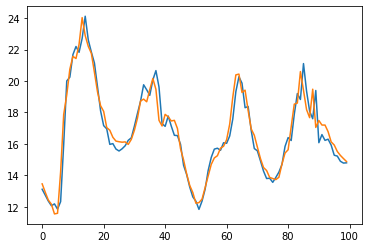

In [67]:
plot_predictions1(model4, X2_test, y2_test)

In [68]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917


In [70]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [71]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [72]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [73]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [74]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

In [75]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                18176     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [76]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.1870 - root_mean_squared_error: 0.4324

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 16s 8ms/step - loss: 0.1864 - root_mean_squared_error: 0.4318 - val_loss: 0.0301 - val_root_mean_squared_error: 0.1736
Epoch 2/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.0197 - root_mean_squared_error: 0.1405

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.0197 - root_mean_squared_error: 0.1404 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1158
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0107 - root_mean_squared_error: 0.1035

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 14s 7ms/step - loss: 0.0107 - root_mean_squared_error: 0.1035 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0885
Epoch 4/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0078 - root_mean_squared_error: 0.0883

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.0078 - root_mean_squared_error: 0.0883 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0781
Epoch 5/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.0813

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.0066 - root_mean_squared_error: 0.0813 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0709
Epoch 6/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.0769

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 14s 7ms/step - loss: 0.0059 - root_mean_squared_error: 0.0769 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0690
Epoch 7/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.0743

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.0055 - root_mean_squared_error: 0.0742 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0640
Epoch 8/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.0729

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 14s 7ms/step - loss: 0.0053 - root_mean_squared_error: 0.0729 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0633
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0052 - root_mean_squared_error: 0.0720 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0668
Epoch 10/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.0715

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.0051 - root_mean_squared_error: 0.0715 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0616


In [78]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.408313,0.412451,-0.794383,-0.793439
1,0.367910,0.353683,-0.782778,-0.763123
2,0.331754,0.323123,-0.749575,-0.721893
3,0.331989,0.250251,-0.699961,-0.652773
4,0.279723,0.254952,-0.613843,-0.652773
...,...,...,...,...
95,0.698845,0.716869,-0.420726,-0.416310
96,0.660062,0.687485,-0.419829,-0.399333
97,0.646171,0.663978,-0.404428,-0.399333
98,0.649445,0.641646,-0.396808,-0.400546


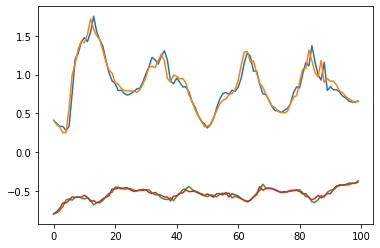

In [79]:
plot_predictions2(model5, X3_test, y3_test)

In [80]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,12.894799,12.93,982.422241,982.43
1,12.551044,12.43,982.517944,982.68
2,12.243427,12.17,982.791748,983.02
3,12.245427,11.55,983.200867,983.59
4,11.800751,11.59,983.911072,983.59
...,...,...,...,...
95,15.366652,15.52,985.503601,985.54
96,15.036680,15.27,985.510986,985.68
97,14.918493,15.07,985.638000,985.68
98,14.946350,14.88,985.700867,985.67


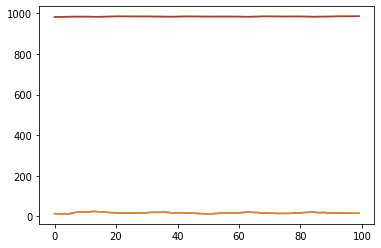

In [81]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

post_processed_df = plot_predictions2(model5, X3_test, y3_test)
post_processed_df



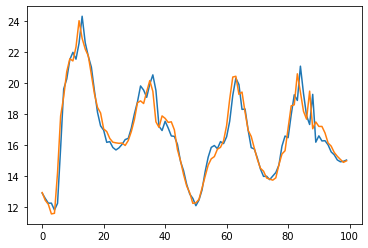

In [82]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

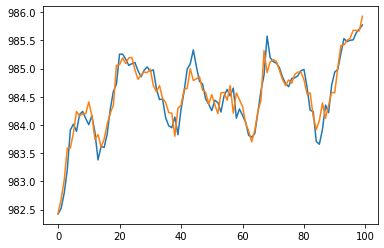

In [83]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

In [84]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 7, 32)             4992      
                                                                 
 lstm_5 (LSTM)               (None, 64)                24832     
                                                                 
 dense_12 (Dense)            (None, 8)                 520       
                                                                 
 dense_13 (Dense)            (None, 2)                 18        
                                                                 
Total params: 30,362
Trainable params: 30,362
Non-trainable params: 0
_________________________________________________________________


In [85]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.2162 - root_mean_squared_error: 0.4649

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 29s 14ms/step - loss: 0.2161 - root_mean_squared_error: 0.4648 - val_loss: 0.0424 - val_root_mean_squared_error: 0.2059
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0331 - root_mean_squared_error: 0.1819

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 25s 13ms/step - loss: 0.0331 - root_mean_squared_error: 0.1819 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1464
Epoch 3/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0167 - root_mean_squared_error: 0.1292

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 22s 12ms/step - loss: 0.0167 - root_mean_squared_error: 0.1292 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1064
Epoch 4/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0112 - root_mean_squared_error: 0.1059

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 23s 12ms/step - loss: 0.0112 - root_mean_squared_error: 0.1059 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0930
Epoch 5/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.0091 - root_mean_squared_error: 0.0952

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 22s 12ms/step - loss: 0.0091 - root_mean_squared_error: 0.0952 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0858
Epoch 6/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.0871

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 23s 12ms/step - loss: 0.0076 - root_mean_squared_error: 0.0871 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0803
Epoch 7/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.0805

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 23s 12ms/step - loss: 0.0065 - root_mean_squared_error: 0.0805 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0707
Epoch 8/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.0765

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 22s 12ms/step - loss: 0.0059 - root_mean_squared_error: 0.0765 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0669
Epoch 9/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.0745

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 23s 12ms/step - loss: 0.0055 - root_mean_squared_error: 0.0745 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0653
Epoch 10/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0734

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


1875/1875 [==============================] - 23s 12ms/step - loss: 0.0054 - root_mean_squared_error: 0.0734 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0641


In [ ]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))
model7.summary()

cp7 = ModelCheckpoint('model6/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])